In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# untuk membaca dataset dan mengeksplorasi awal
df = pd.read_csv("disperkim-od_18378_jml_sampah_terangkut_ke_tempat_pembuangan_akhir_tpa__k_data.csv")

print("5 baris pertama")
print(df.head())

print("Informasi dataset")
print(df.info())

print("Ini adalah dataset jumlah sampah yang terangkut ke TPA di setiap kabupaten / kota Jawa Barat dari tahun 2016 sampai tahun 2023 tanpa adanya tahun 2019. Terdapat 189 baris dan 8 kolom, dengan jumlah sampah bertipe object karena adanya nilai anomali.")

df['jumlah_sampah'] = pd.to_numeric(df['jumlah_sampah'], errors='coerce')

In [ ]:
total_per_tahun = df.groupby('tahun')['jumlah_sampah'].sum().reset_index()
total_per_tahun = total_per_tahun.sort_values('tahun')
total_per_tahun.columns = ['tahun', 'total_sampah_jawa_barat']

print("Total Sampah per Tahun:")
print(total_per_tahun)

# Tahun tertinggi dan terendah
max_year = total_per_tahun.loc[total_per_tahun['total_sampah_jawa_barat'].idxmax()]
min_year = total_per_tahun.loc[total_per_tahun['total_sampah_jawa_barat'].idxmin()]

print(f"Tahun dengan sampah terbanyak: {int(max_year.tahun)} → {max_year.total_sampah_jawa_barat:,} ton/hari")
print(f"Tahun dengan sampah tersedikit: {int(min_year.tahun)} → {min_year.total_sampah_jawa_barat:,} ton/hari")

In [ ]:
df_2021 = df[df['tahun'] == 2021].copy()
top5_2021 = df_2021.nlargest(5, 'jumlah_sampah')[['nama_kabupaten_kota', 'jumlah_sampah', 'tahun']]
print("Top 5 Kab/Kota Penyumbang Sampah Terbanyak 2021:")
print(top5_2021)

print("Pada tahun 2021, Kota Bandung adalah penyumbang sampah terbesar dengan 1.430 ton/hari, "
      "diikuti Kota Bekasi (1.061 ton/hari)     dan Kota Depok (1.194 ton/hari).")

In [ ]:
stats = df.groupby('nama_kabupaten_kota')['jumlah_sampah'].agg(['mean', 'median']).round(2)
stats = stats.reset_index()
stats.columns = ['nama_kabupaten_kota', 'mean_jumlah_sampah', 'median_jumlah_sampah']
stats = stats.sort_values('mean_jumlah_sampah', ascending=False)

print("3 Kabupaten / Kota dengan rata rata sampah terbesar (2016 - 2023) :")
print(stats.head(3))

In [ ]:
total_2016 = df[df['tahun']==2016]['jumlah_sampah'].sum()
total_2023 = df[df['tahun']==2023]['jumlah_sampah'].sum()
selisih = total_2023 - total_2016
persentase = (selisih / total_2016) * 100

print(f"2016: {total_2016:,} ton/hari")
print(f"2023: {total_2023:,} ton/hari")
print(f"Selisih: {selisih:,} ton/hari")
print(f"Perubahan: {persentase:,}%")

print("Kesimpulan : Terjadi penurunan signifikan sebesar 58.97 % dari 2016 ke 2023.")

In [ ]:
total_jabar_2021 = df_2021['jumlah_sampah'].sum()
df_2021['persentase_kontribusi'] = (df_2021['jumlah_sampah'] / total_jabar_2021 * 100).round(2)
top10_kontribusi = df_2021.nlargest(10, 'persentase_kontribusi')[['nama_kabupaten_kota', 'jumlah_sampah', 'persentase_kontribusi']]

print("10 Besar kontribusi sampah 2021:")
print(top10_kontribusi)       

print("Tiga wilayah teratas (Kota Bandung 15.3%, Depok 12.8%, Bekasi 11.3%) menyumbang hampir 40% "
      "total sampah Jawa Barat tahun 2021 → kontribusi sangat signifikan!")

In [ ]:
bandung = df[df['nama_kabupaten_kota'] == 'KOTA BANDUNG'][['tahun', 'jumlah_sampah']].sort_values('tahun')
print("\nData Kota Bandung per Tahun:")
print(bandung)

print("\n→ Jumlah sampah tertinggi: 2018 = 7.060,8 ton/hari")
print("→ Tren secara keseluruhan: NAIK TAJAM hingga 2018, lalu TURUN DRASTIS pada 2020–2023 (kemungkinan akibat pandemi + perubahan metode pelaporan)")

In [ ]:
pivot = df.pivot_table(index='nama_kabupaten_kota', columns='tahun', values='jumlah_sampah', fill_value=0)
print("\nAda data hilang? → Ya, terutama tahun 2018 dan 2021")
pivot = pivot.fillna(0)


print("\nKota Bandung per tahun (setelah isi 0):")
print(pivot.loc['KOTA BANDUNG'])
print("Tahun tanpa data sebelum diisi 0: 2019 (memang tidak ada), 2018 & 2020–2023 ada data")

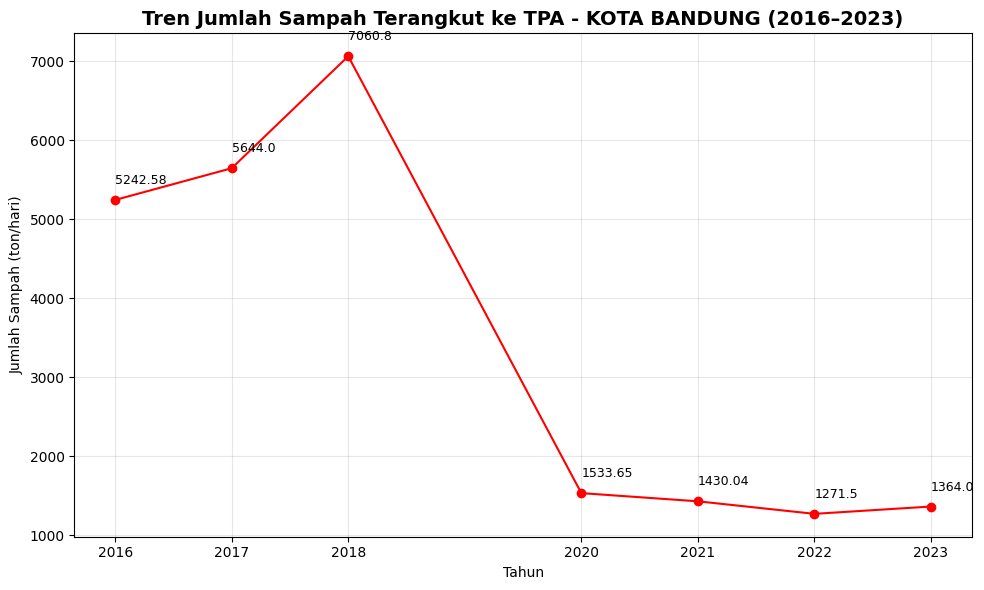

In [17]:
bandung_plot = df[df['nama_kabupaten_kota'] == 'KOTA BANDUNG'].sort_values('tahun')

plt.figure(figsize=(10,6))
plt.plot(bandung_plot['tahun'], bandung_plot['jumlah_sampah'], marker='o', linestyle='-', color='red')
plt.title('Tren Jumlah Sampah Terangkut ke TPA - KOTA BANDUNG (2016–2023)', fontsize=14, fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sampah (ton/hari)')
plt.grid(True, alpha=0.3)
plt.xticks(bandung_plot['tahun'])
for i, v in enumerate(bandung_plot['jumlah_sampah']):
    plt.text(bandung_plot['tahun'].iloc[i], v + 200, str(v), fontsize=9)
plt.tight_layout()
plt.show()